# Table of Contents

- [Imports](#Imports)
- [Data Read in and Cleaning](#Data-Read-in-and-Cleaning)

This code looks into the data a bit from [YRBS National Survey](https://www.cdc.gov/healthyyouth/data/yrbs/pdf/2019/2019_YRBS_SADC_Documentation.pdf). 

## Imports
[back to top](#Table-of-Contents)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Read in and Cleaning
[back to top](#Table-of-Contents)

In [101]:
root = "../data/"
survDat = pd.concat([pd.read_csv(root + "SADCQFirst200k.csv"),
                     pd.read_csv(root + "SADCQMid200k.csv"),
                     pd.read_csv(root + "SADCQLast.csv")],
                    ignore_index=True)
survDat.head()

,sitecode,sitename,sitetype,sitetypenum,year,survyear,weight,stratum,PSU,record,...,qwenthungry,qmusclestrength,qsunscreenuse,qindoortanning,qsunburn,qconcentrating,qcurrentasthma,qwheresleep,qspeakenglish,qtransgender
0,NYI,"Borough of Manhattan, NY (NYI)",District,1,2007,9,3.7107,49,2,1776279,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NYI,"Borough of Manhattan, NY (NYI)",District,1,2007,9,7.3810,49,2,1776280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NYI,"Borough of Manhattan, NY (NYI)",District,1,2007,9,3.8955,49,2,1776281,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NYI,"Borough of Manhattan, NY (NYI)",District,1,2007,9,29.5199,14,2,1776282,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NYI,"Borough of Manhattan, NY (NYI)",District,1,2007,9,29.5199,14,2,1776283,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
survDat.year.unique()

array([2007, 1991, 1993, 1995, 1997, 1999, 2001, 2003, 2005, 2009, 2011,
       2013, 2015, 2017, 2019])

In [37]:
survDat.groupby(["year"])["survyear"].nunique()
survDat = survDat.drop("survyear", axis=1)

In [38]:
if survDat["record"].nunique() == survDat.shape[0]:
    survDat = survDat.drop("record", axis=1)

In [40]:
survDat.columns

Index(['sitecode', 'sitename', 'sitetype', 'sitetypenum', 'year', 'weight',
       'stratum', 'PSU', 'age', 'sex',
       ...
       'qwenthungry', 'qmusclestrength', 'qsunscreenuse', 'qindoortanning',
       'qsunburn', 'qconcentrating', 'qcurrentasthma', 'qwheresleep',
       'qspeakenglish', 'qtransgender'],
      dtype='object', length=149)

**Note**: `weight`, `stratum`, and `PSU` are sample weights and other things to make analysis repersent the population. Using these may be beyond our ability, but it is good to note these are available. [This paper](http://www.stat.columbia.edu/~gelman/research/unpublished/modelweighting.pdf) or [this paper](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4357363/) may be of use if we do decide to use the weights. Also [here](https://www.cdc.gov/healthyyouth/data/yrbs/pdf/2019/2019_YRBS_analysis_software.pdf) is the YRBS documentation on the weights, and the variables are talked about on page 6 of [this documentation](https://www.cdc.gov/healthyyouth/data/yrbs/pdf/2019/2019_YRBS_SADC_Documentation.pdf).

In [46]:
# columns missing all data
survDat.loc[:,survDat.isna().all()].head()

,qdrivemarijuana,qcelldriving,qchokeself,qdietpop,qcoffeetea,qsugardrink,qfoodallergy,qconcentrating,qspeakenglish
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
# dropping columns with all missing
survDat = survDat.drop(survDat.loc[:,survDat.isna().all()].columns, axis=1)

In [55]:
# columns with 90 percent of the data missing
survDat.loc[:, survDat.isna().sum().div(survDat.shape[0]) > .9]

,q39,q83,q85,qbullyweight,qbullygender,qtypealcohol2,qhowmarijuana,qcurrentopioid,qcurrentheroin,qcurrentmeth,...,qtaughtbc,qsportsdrink,qenergydrink,qwater,qfastfood,qwenthungry,qsunscreenuse,qindoortanning,qsunburn,qwheresleep
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504244,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
504245,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
504246,3.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
504247,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
# dropping columns with 90 percent of the data missing
survDat = survDat.drop(survDat.loc[:, survDat.isna().sum().div(survDat.shape[0]) > .9].columns, axis=1)
survDat.head()

,sitecode,sitename,sitetype,sitetypenum,year,weight,stratum,PSU,age,sex,...,qcigschool,qchewtobschool,qalcoholschool,qmarijuanaschool,qcurrentcocaine,qgenderexp,qtaughtHIV,qmusclestrength,qcurrentasthma,qtransgender
0,NYI,"Borough of Manhattan, NY (NYI)",District,1,2007,3.7107,49,2,5.0,1.0,...,1.0,NaN,1.0,1.0,NaN,NaN,2.0,NaN,NaN,NaN
1,NYI,"Borough of Manhattan, NY (NYI)",District,1,2007,7.3810,49,2,5.0,1.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NYI,"Borough of Manhattan, NY (NYI)",District,1,2007,3.8955,49,2,5.0,1.0,...,1.0,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN
3,NYI,"Borough of Manhattan, NY (NYI)",District,1,2007,29.5199,14,2,5.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
4,NYI,"Borough of Manhattan, NY (NYI)",District,1,2007,29.5199,14,2,5.0,1.0,...,1.0,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN


In [73]:
# These are the categories of the questions
carRiskqs = ["q8", "q9", "q10", "q11"]
violenceqs = ["q12", "q13", "q14", "q15",
              "q16", "q17", "q18"]
sexqs = ["q19", "q20", "q21", "q22", "q58", "q59",
         "q60", "q61", "q62", 
         "q63", "q64", "qtaughtHIV"]
bullyqs = ["q23", "q24", "qbullygay"]
suicideqs = ["q25", "q26", "q27", 
             "q28", "q29"]
drugqs = ["q30", "q32", "q33",
          "q38", "q40", "q41",
          "q45", "q46", "q47",
          "q50", "q51", "q52",
          "q53", "q54", "q55",
          "q56", "q57", "qcigschool",
          "qalcoholschool", "qmarijuanaschool",
          'q31', 'q34', 'q35',
          'q36', 'q37', 'q42', 
          'q43', 'q44', 'q48',
          'q49', "qchewtobschool",
          "qcurrentcocaine"]
selfqs = ["q65", "q66", "q67",
          "q68", "q89", "qnowt",
          "qnobese", "bmipct", "bmi",
          "sexpart", "sexpart2", "sexid",
          "sexid2", "stheight", "stweight",
          "race4", "race7", "sex",
          "age", "grade", "qgenderexp",
          "qmusclestrength", "qcurrentasthma",
          "qtransgender"] 
selfHealthqs = ["q69", "q70", "q71",
                "q72", "q73", "q74",
                "q76", "q79", "q81",
                "q82", "q87", 'q75',
                'q77', 'q78', 'q80',
                'q84', 'q86', 'q88'] # may want to move some of these to sexqs
riskqs = ["qbikehelmet", "qpropertydamage"]

In [74]:
# cols left over
survDat.drop(carRiskqs+violenceqs+sexqs+suicideqs+drugqs+selfqs+selfHealthqs+riskqs+bullyqs, axis=1).columns

Index(['sitecode', 'sitename', 'sitetype', 'sitetypenum', 'year', 'weight',
       'stratum', 'PSU'],
      dtype='object')

In [76]:
survDat = survDat.drop(['sitetype', 'sitetypenum'], axis=1)

/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

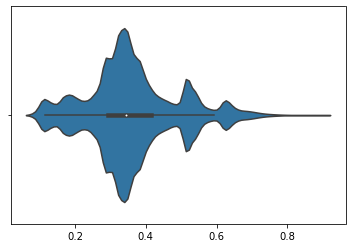

In [85]:
# plotting the distribution of percent missing columns for each person.
# we see there is a bump at .6, which is probably an early year that
# didnt have too many questions. So we will drop .65 and above.
sns.violinplot(survDat.isna().sum(axis=1).div(survDat.shape[1]))

In [91]:
survDat = survDat.drop(survDat.loc[survDat.isna().sum(axis=1).div(survDat.shape[1]) > .65, :].index)

In [100]:
# saving in two batchs because github needs individual files 
# to be less than 100 MB
survDat10s = survDat.query("year >= 2010")
survDatBefore10s = survDat.query("year < 2010")
survDat10s.to_csv(root + "cleanSurv10s.csv", index=False)
survDatBefore10s.to_csv(root + "cleanSurvBefore10s.csv", index=False)